# Python for Data Analysis - Workbook 4 (Plotting & Visualization)

### Preliminaries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

[0 1 2 3 4 5 6 7 8 9]


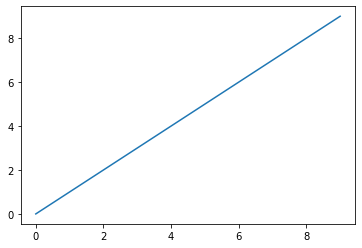

In [5]:
data = np.arange(10)
print(data)

# Easy line plot
plt.plot(data)

In [ ]:
# https://matplotlib.org/3.2.2/api/pyplot_summary.html

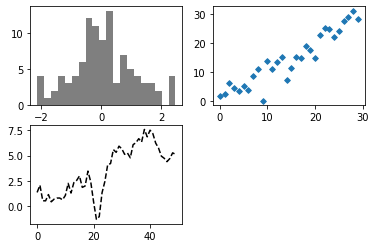

In [35]:
np.random.seed(10)

# Plots in matplotlib reside within a Figure object
# Create a new figure object with plt.figure()

fig = plt.figure()

# Now add a subplot

ax1 = fig.add_subplot(2, 2, 1) # first two args are figure size (2x2), and third arg is the quadrant we're selecting
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

# Plotting commands always start on the last figure and subplot by default
plt.plot(np.random.randn(50).cumsum(), color = 'k', linestyle = '--')

ax1.hist(np.random.randn(100), bins = 20, color = 'k', alpha = 0.5)
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30), s = 16, marker = 'D') # s for dot size


array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a279670b8>,
      dtype=object)

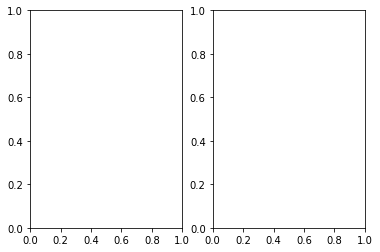

In [39]:
# Creating a figure with a grid of subplots is very common, so matplotlib includes a convenience method
# plt.subplots, that creates a new figure and returns a NumPy array containing the created subplot objects

fig, axes = plt.subplots(1, 2)
axes # Notice this is an array and can be acessed as such

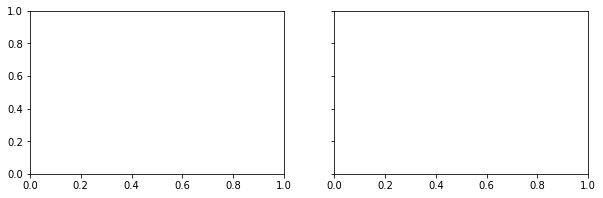

In [51]:
# Can also share axes

fig, axes = plt.subplots(1, 2, figsize = (10,3), sharey = True)

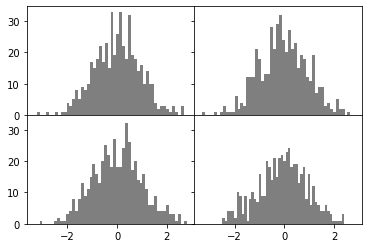

In [53]:
# Can also control the padding between and around the subplots, as in this example to shrink gap between to 0

fig, axes = plt.subplots(2,2, sharex = True, sharey = True)
for i in range(2):
    for j in range(2):
        axes[i,j].hist(np.random.randn(500), bins = 50, color = 'k', alpha = 0.5)

plt.subplots_adjust(wspace = 0, hspace = 0)

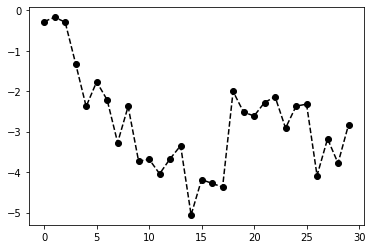

In [56]:
# Can combine the args for color, marker style, and line style for convenience

plt.plot(np.random.randn(30).cumsum(), 'ko--')

# color = 'k'
# linestyle = 'dashed'
# marker = 'o'

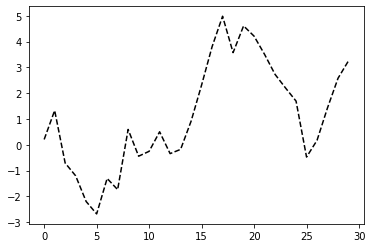

In [57]:
# Line plots are linearly interpolated by default but can be shown as steps instead

data = np.random.randn(30).cumsum()

plt.plot(data, 'k--', label = 'Default')

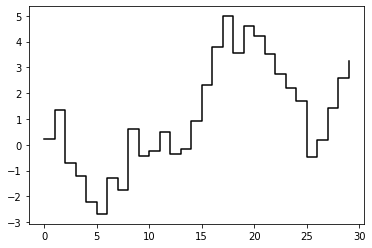

In [58]:
plt.plot(data, 'k-', drawstyle = 'steps-post', label = 'steps-post')

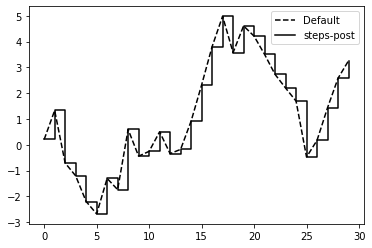

In [60]:
plt.plot(data, 'k--', label = 'Default')
plt.plot(data, 'k-', drawstyle = 'steps-post', label = 'steps-post')
plt.legend(loc='best')

# Must call plt.legend (or ax.legend) to create the legend whether or not you passed the label options when plotting the data

#### Ticks, Labels, and Legends

In [64]:
# Two ways to adjust plot decorations: procedural pyplot interface, or object-oriented matplotlib API

##### *Pyplot Way*

In [ ]:
# Note that these methods all act on the active or most recently created AxesSubplot

(0.0, 1.0)

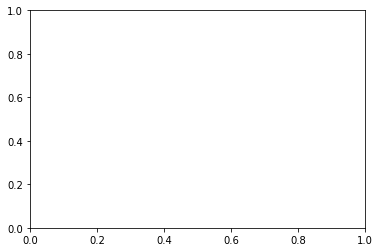

In [68]:
plt.xlim() # get value

# For axes object, can use ax.get_xlim to be more explicit

(0, 10)

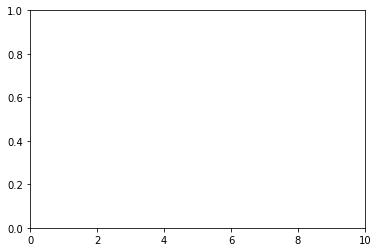

In [69]:
plt.xlim([0, 10]) # set value

# For axes object, can use ax.set_xlim to be more explicit

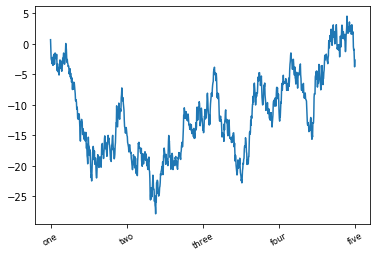

In [80]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(1000).cumsum())

ticks = ax.set_xticks([0, 250, 500, 750, 1000]) # Array for the locations of the ticks
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'], rotation = 30, fontsize = 'small') # fancy labels

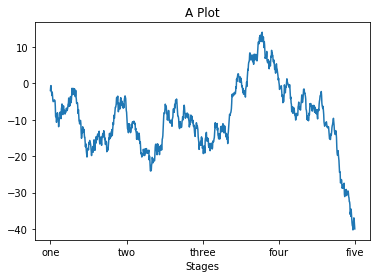

In [95]:
# The Axes class has a set method that allows batch setting the plot properties

fig = plt.figure()

props = {
    'title': 'A Plot',
    'xlabel': 'Stages',
    'xticks': [0, 250, 500, 750, 1000], 
    'xticklabels':['one', 'two', 'three', 'four', 'five']
}


ax = fig.add_subplot(1, 1, 1)
ax.set(**props) # Note the prefix **
ax.plot(np.random.randn(1000).cumsum())

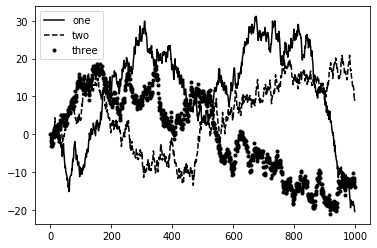

In [98]:
# Adding legends

fig = plt.figure();
ax = fig.add_subplot(1, 1, 1)

ax.plot(np.random.randn(1000).cumsum(), 'k', label = 'one')
ax.plot(np.random.randn(1000).cumsum(), 'k--', label = 'two')
ax.plot(np.random.randn(1000).cumsum(), 'k.', label = 'three')
ax.legend(loc = 'best')

Text(0.5, 1.0, 'Important Dates in the 2008-2009 financial crisis')

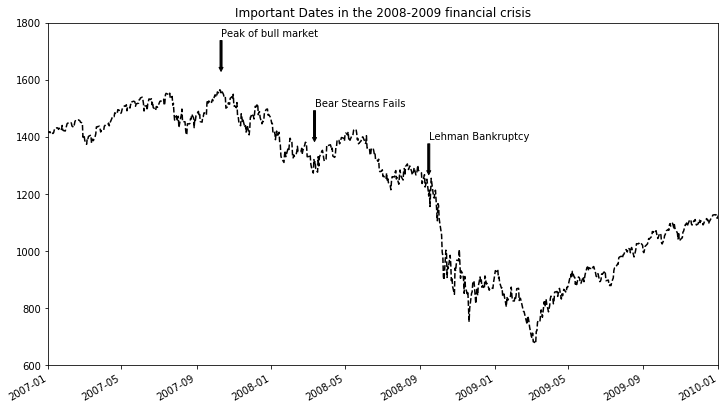

In [118]:
# Example of annotation

from datetime import datetime

fig = plt.figure(figsize = [12, 7])
ax = fig.add_subplot(1, 1, 1)

data = pd.read_csv('pydata-book/examples/spx.csv', index_col = 0, parse_dates = True)
spx = data['SPX']

spx.plot(ax=ax, style = 'k--')

crisis_data = [(datetime(2007, 10, 11), 'Peak of bull market'), 
              (datetime(2008, 3, 12), 'Bear Stearns Fails'),
              (datetime(2008, 9, 15), 'Lehman Bankruptcy')]

for date, label in crisis_data:
    ax.annotate(label, 
                xy = (date, spx.asof(date) + 75), 
                xytext = (date, spx.asof(date) + 225), 
                arrowprops = dict(facecolor='k', 
                                  headwidth = 4, 
                                  width = 2, 
                                  headlength = 4), 
               horizontalalignment = 'left', 
               verticalalignment = 'top')
    
# Zoom in on 2007 - 2010

ax.set_xlim(['1/1/2007', '1/1/2010'])
ax.set_ylim([600, 1800])
ax.set_title('Important Dates in the 2008-2009 financial crisis')

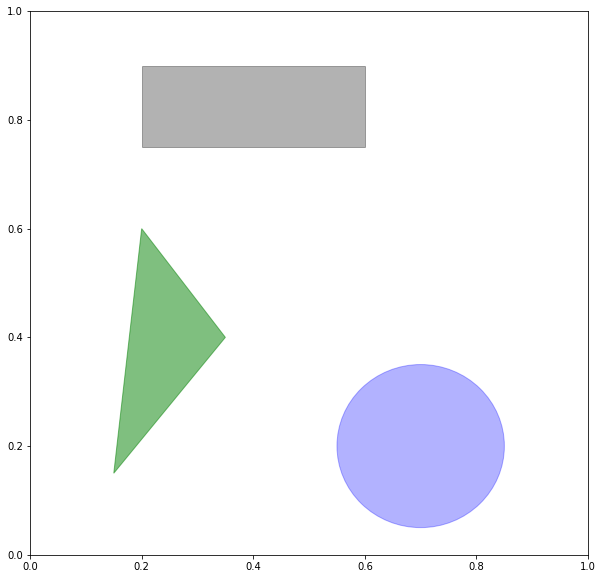

In [128]:
# Draw shapes

fig, ax = plt.subplots(figsize = [10, 10]) # Defines both the figure object and axes object together

rect = plt.Rectangle(xy = (0.2, 0.75), width = 0.4, height = 0.15, color = 'k', alpha = 0.3)
circ = plt.Circle(xy = (0.7, 0.2), radius =  0.15, color = 'b', alpha = 0.3)
pgon = plt.Polygon(xy = [[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]], color = 'g', alpha = 0.5)

ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

# Save the file

plt.savefig('shapes.png', dpi = 400, bbox_inches = 'tight') # bbox setting trims whitespace


### Plotting with Pandas and Seaborn

In [129]:
# Both pandas and seaborn are wrappers aound basic matplotlib

#### Line Plots

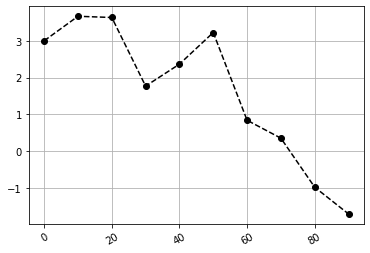

In [136]:
# Pandas

s = pd.Series(np.random.randn(10).cumsum(), index = np.arange(0, 100, 10))
s.plot(label = 'line', style = 'ko--', rot = '30', grid = 'False')

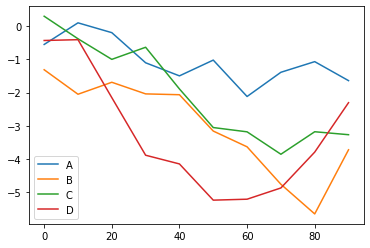

In [152]:
# Dataframe plots all columns on a different line on the same subplot, creating a legend automatically

df = pd.DataFrame(np.random.randn(10, 4).cumsum(0), columns = list('ABCD'), index = np.arange(0, 100, 10))
df.plot()

#### Bar Plots

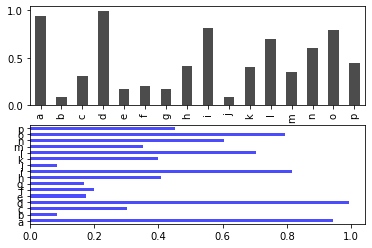

In [149]:
# Bar plot

fig, axes = plt.subplots(2, 1)

data = pd.Series(np.random.rand(16), index = list('abcdefghijklmnop'))
data.plot(kind = 'bar', ax=axes[0], color = 'k', alpha = 0.7)
data.plot(kind = 'barh', ax = axes[1], color = 'b', alpha = 0.7)

Genus         A         B         C         D
one    0.841303  0.561175  1.142686  1.574753
two    0.710603  1.044881  0.854824  0.752632
three  1.175924  0.422139  1.385078  1.629239
four   0.271381  0.148711  1.854443  2.104860
five   0.983020  0.544948  1.080279  0.769868
six    0.041725  1.871030  0.616812  1.039666


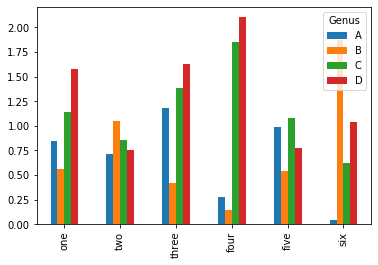

In [157]:
# For a DF, bar plots group values in each row together in a group in bars, side-by-side for each value 

df = pd.DataFrame(np.abs(np.random.randn(6, 4)), index = ['one', 'two', 'three', 'four', 'five', 'six'], 
                 columns = pd.Index(list('ABCD'), name = 'Genus'))
print(df)

df.plot(kind = 'bar')

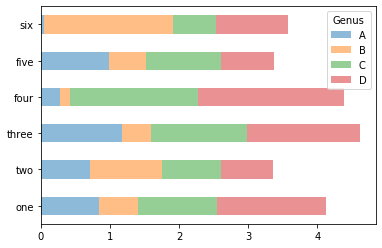

In [158]:
# Can also maked stacked bar charts in a very similar fashion by passing stacked = True

df.plot(kind = 'barh', stacked = True, alpha = 0.5)

In [161]:
tips = pd.read_csv('pydata-book/examples/tips.csv')
tips.head()

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


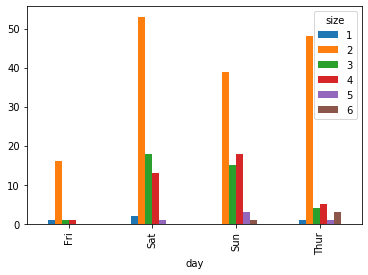

In [164]:
party_counts = pd.crosstab(tips['day'], tips['size']) # creates a simple frequency table of two or more factors
party_counts.plot(kind = 'bar')

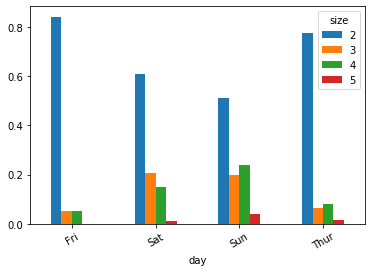

In [169]:
# We can normalize this into a percentage as well, dropping 1 and 6 parties as outliers

party_pcts = party_counts.loc[:, 2:5].div(party_counts.sum(1), axis = 0)
party_pcts.plot(kind = 'bar', rot = 30, yticks = np.arange(0, 1, .2))